<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/create_new_shp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

! pip install geopandas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

In [3]:
newdata = gpd.GeoDataFrame()

In [4]:
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [5]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

In [6]:
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [7]:
# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [8]:
# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

In [9]:
# Check the polyogon
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [10]:
# Insert the polygon into 'geometry' -column at row 0
newdata.at[0, 'geometry'] = poly

In [11]:
# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


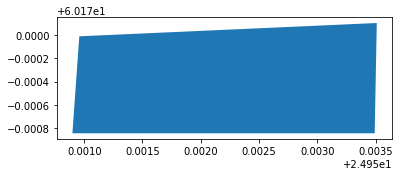

In [12]:
newdata.plot()

In [13]:
# Add a new column and insert data 
newdata.at[0, 'location'] = 'Senaatintori'

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


In [14]:
print(newdata.crs)

None


In [15]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = CRS.from_epsg(4326).to_wkt()

In [16]:
print(newdata.crs)

GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


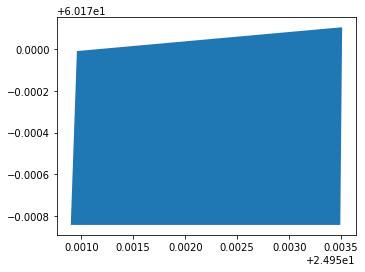

In [17]:
newdata.plot()

In [20]:
import os
output_folder = r"L3_data/"

# Create a new folder called 'Results' 
result_folder = os.path.join(output_folder, 'Results')

# Check if the folder exists already
if not os.path.exists(result_folder):
    
    print("Creating a folder for the results..")
    # If it does not exist, create one
    os.makedirs(result_folder)
    
else:
    print("Results folder exists already.")

Creating a folder for the results..


In [21]:
# Determine the output path for the Shapefile
outfp = "L3_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)